<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Age%2C_Gender_and_Race_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📚Introduction**

# **📚Sections**

# **📚Import library**

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as imgen
from keras.models import load_model, Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing import image
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error

ImageDataGenerator is a class that provides a variety of methods for augmenting image data, such as rotating, zooming, and flipping images. This is particularly useful for deep learning models as it helps to prevent overfitting by creating more diverse training data from your existing images.

# **📚Load Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data = pd.read_csv("/content/gdrive/MyDrive/Datasets (1)/Age, Gender and Race Prediction/age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
#shape
data.shape

(23705, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


# **Data Preprocessing**

In [6]:
# Getting Image data

def toPixels(pixels):
    arr = np.array(pixels.split(),"float64")
    arr = arr.reshape(48,48)

    return arr

In [7]:
%%time
data["pixels"] = data["pixels"].apply(toPixels)

CPU times: user 8.5 s, sys: 249 ms, total: 8.75 s
Wall time: 8.83 s


In [8]:
pixels = np.reshape(data["pixels"].to_list(), (data.shape[0],48,48,1))


In [9]:
pixels.shape


(23705, 48, 48, 1)

#**Age Prediction Model**


**Generating Datsets for Age Prediction**


In [9]:
x_train_age,x_test_age, y_train_age,y_test_age = train_test_split(pixels,np.array(data["age"]),random_state = 42, test_size = 0.2)
x_train_age,x_val_age, y_train_age,y_val_age = train_test_split(x_train_age,y_train_age,random_state = 21, test_size = 0.15)

In [11]:
print(x_train_age.shape,y_train_age.shape, x_test_age.shape,x_val_age.shape)

(16119, 48, 48, 1) (16119,) (4741, 48, 48, 1) (2845, 48, 48, 1)


**Image data Generator.**



In [10]:
traingen = imgen(rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip= True
                )
valgen = imgen(rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip= True
                )

testgen = imgen(rescale=1./255)

In [11]:
age_train_ds = traingen.flow(x_train_age,y_train_age,
                        batch_size = 32
                       )

age_val_ds = valgen.flow(x_val_age,y_val_age,
                        batch_size = 32
                       )

age_test_ds = testgen.flow(x_test_age,y_test_age,
                     batch_size = 32,
                    shuffle=False
                     )

In [12]:
#Visualizing one batch.
def showImagesAge(img,label):
    plt.figure(figsize=[22,15])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title("Age is {}".format(label[i]))
        plt.axis('off')
    plt.show()



In [13]:
X,Y = next(age_train_ds)

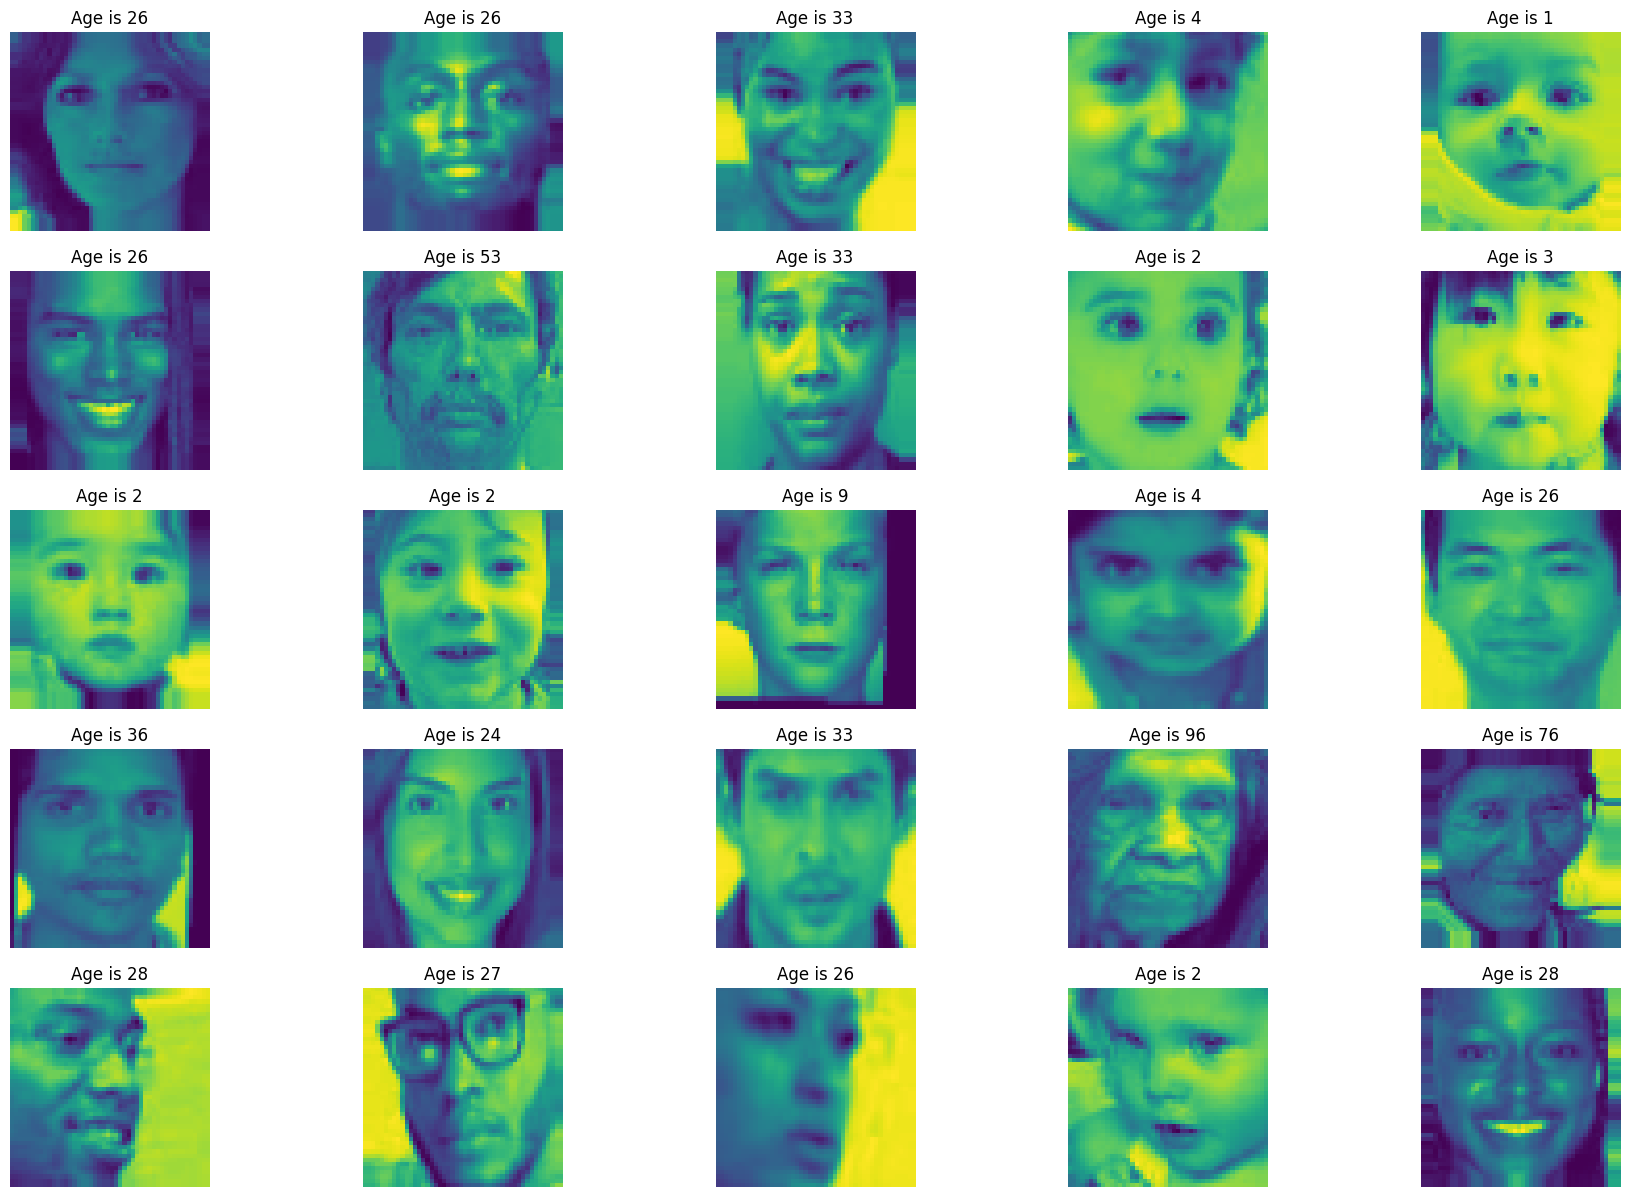

In [14]:
showImagesAge(X,Y)

## **Model**

In [15]:
image_input = keras.Input(shape=(48,48,1))

l1 = Conv2D(32,(3,3), activation="relu")(image_input)
l2 = Conv2D(32,(3,3), activation="relu")(l1)
l3 = MaxPooling2D(pool_size=(2, 2))(l2)

l4 = Dropout(0.30)(l3)

l5 = Conv2D(64,(3,3), activation="relu")(l4)
l6 = Conv2D(128,(3,3), activation="relu")(l5)

#l7 = BatchNormalization()(l6)

l8 = Flatten()(l6)
l9 = Dense(256, activation= "relu")(l8)
image_output = Dense(1)(l9)
model_age = keras.Model(image_input, image_output)

In [16]:
model_age.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                             

In [17]:
# Compiling the model
model_age.compile(optimizer='adam', loss = 'mse', metrics=[keras.metrics.mean_absolute_error])

**Defining callbacks.**

In [18]:
my_calls = [keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error',patience=3),
            keras.callbacks.ModelCheckpoint("Model_age.h5",verbose=1,save_best_only=True)]

**Training the model for age.**

In [19]:
hist_age = model_age.fit(age_train_ds,epochs=35,validation_data=age_val_ds,callbacks=my_calls)

Epoch 1/35
504/504 [==============================] - ETA: 0s - loss: 382.7908 - mean_absolute_error: 15.0042
Epoch 1: val_loss improved from inf to 239.93715, saving model to Model_age.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


504/504 [==============================] - 19s 25ms/step - loss: 382.7908 - mean_absolute_error: 15.0042 - val_loss: 239.9371 - val_mean_absolute_error: 11.7806
Epoch 2/35
502/504 [============================>.] - ETA: 0s - loss: 237.1443 - mean_absolute_error: 11.6623
Epoch 2: val_loss improved from 239.93715 to 221.46742, saving model to Model_age.h5
504/504 [==============================] - 12s 24ms/step - loss: 237.1849 - mean_absolute_error: 11.6647 - val_loss: 221.4674 - val_mean_absolute_error: 11.8300
Epoch 3/35
504/504 [==============================] - ETA: 0s - loss: 198.5339 - mean_absolute_error: 10.5336
Epoch 3: val_loss improved from 221.46742 to 169.92290, saving model to Model_age.h5
504/504 [==============================] - 12s 24ms/step - loss: 198.5339 - mean_absolute_error: 10.5336 - val_loss: 169.9229 - val_mean_absolute_error: 9.5893
Epoch 4/35
504/504 [==============================] - ETA: 0s - loss: 168.8929 - mean_absolute_error: 9.6561
Epoch 4: val_loss i

**Test for age prediction**



In [20]:
model_age.evaluate(age_test_ds,verbose=1)

149/149 [==============================] - 1s 6ms/step - loss: 91.8037 - mean_absolute_error: 7.2429


[91.8036880493164, 7.242938041687012]

**Loss and MAE**

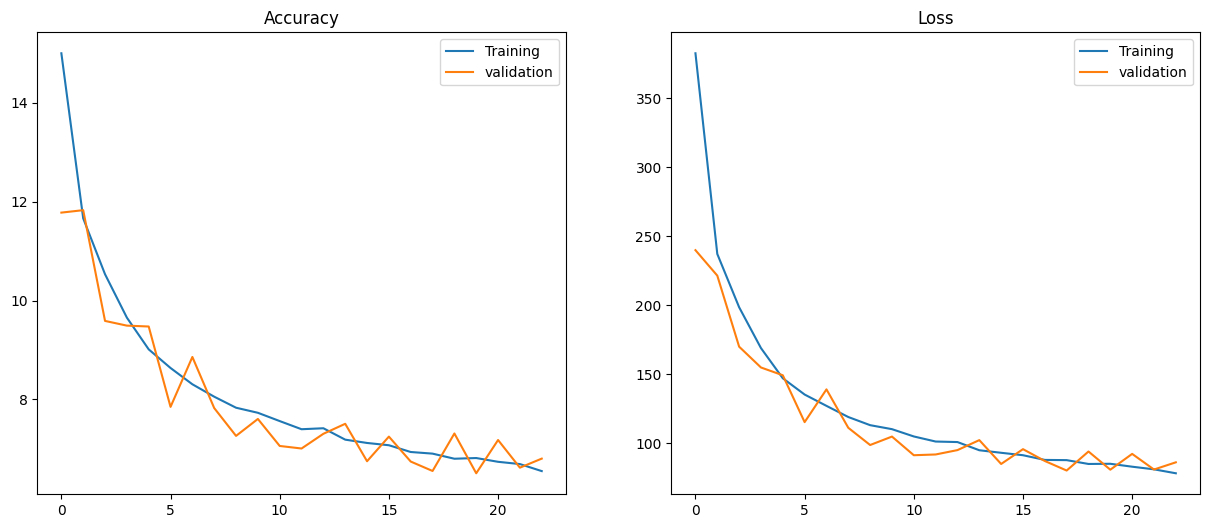

In [21]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist_age.epoch,hist_age.history['mean_absolute_error'],label = 'Training')
plt.plot(hist_age.epoch,hist_age.history['val_mean_absolute_error'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_age.epoch,hist_age.history['loss'],label = 'Training')
plt.plot(hist_age.epoch,hist_age.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

**Verifying the Predictions**

In [22]:
pred_Age = model_age.predict(age_test_ds, verbose=1)


149/149 [==============================] - 1s 6ms/step


**Plotting predicetd v/s actual ages**

In [23]:
pred_age = []
for i in pred_Age:
    pred_age.append(np.round(i[0]))

In [24]:
def plotAgePA(image,pred,actual):
    plt.figure(figsize=[22,15])
    for i in range(500,525):
        plt.subplot(5,5,(i%25)+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test_age[i])
        plt.xlabel("Actual Age is {}".format(actual[i]))
        plt.ylabel("Prediced is {}".format(pred[i]))
    plt.show()

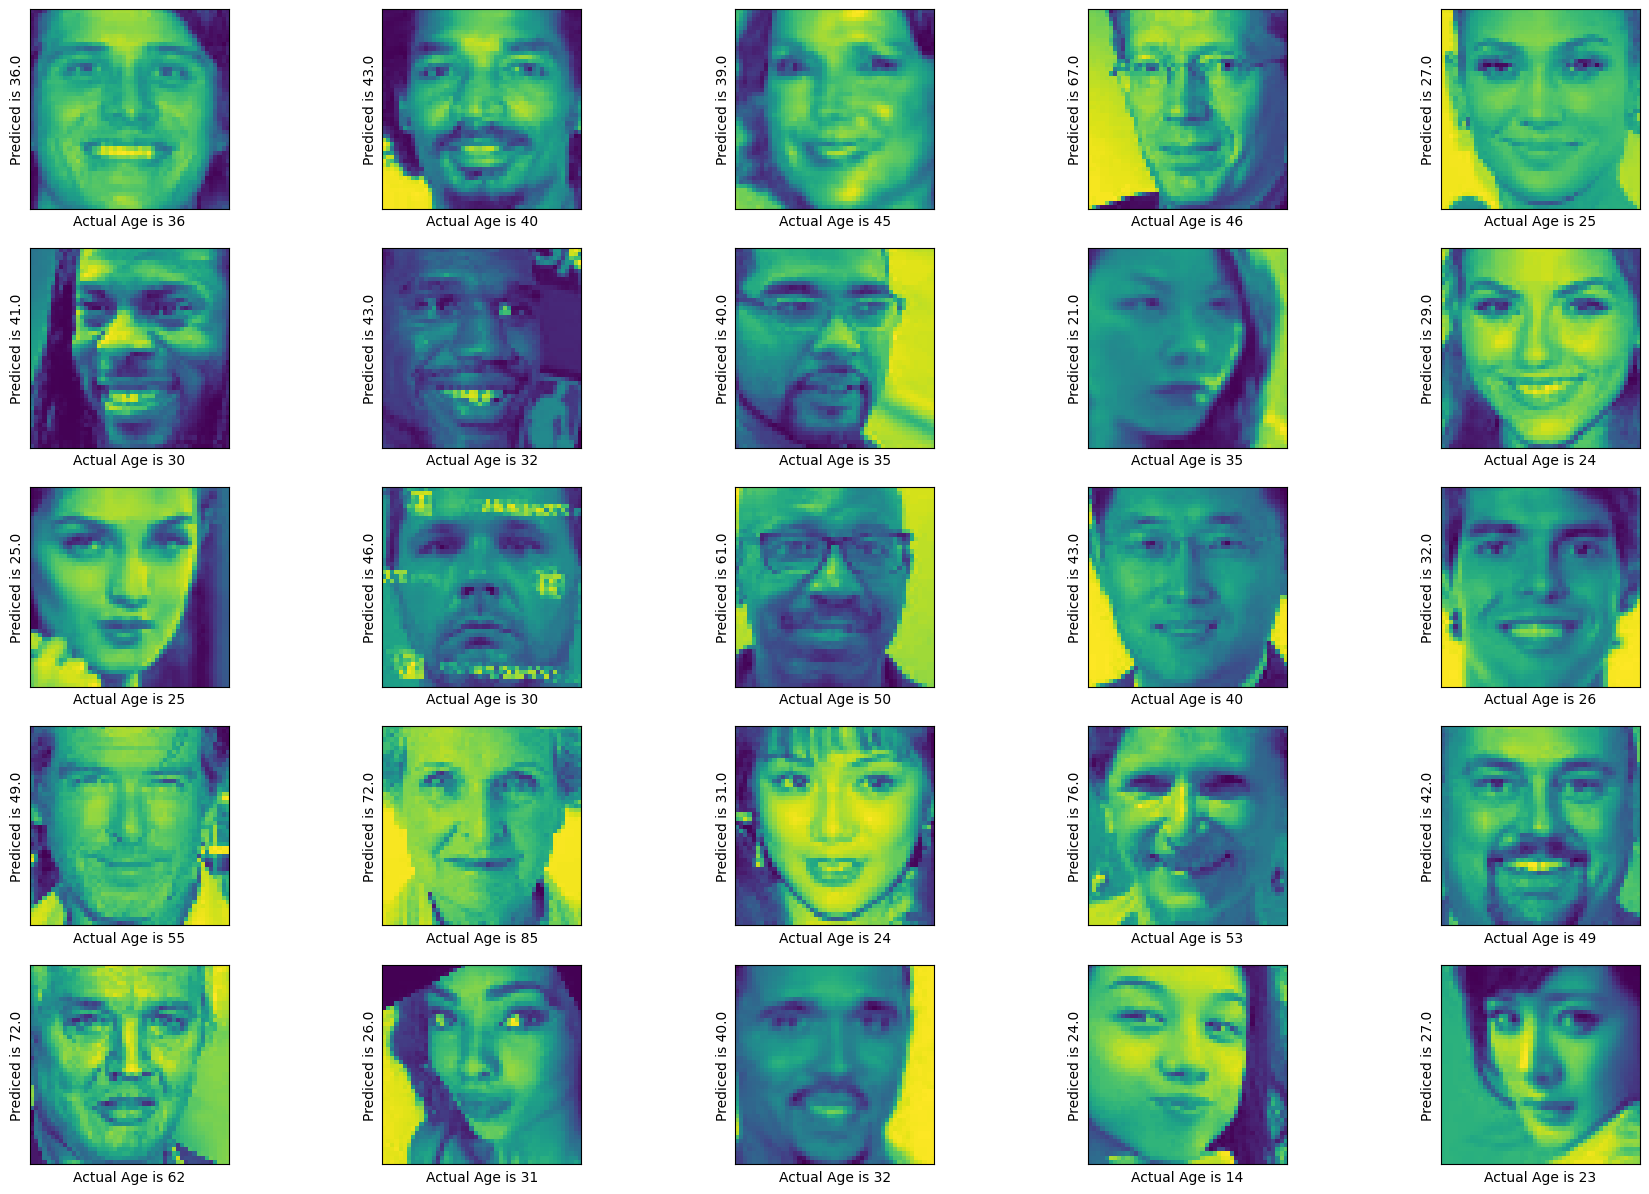

In [25]:
plotAgePA(x_test_age,pred_age,y_test_age)


# **Gender Prediction Model**


**Dataset for Gender Prediction**


In [26]:
x_train_gen,x_test_gen, y_train_gen,y_test_gen = train_test_split(pixels,np.array(data["gender"]),random_state = 42, test_size = 0.2)
x_train_gen,x_val_gen, y_train_gen,y_val_gen = train_test_split(x_train_gen,y_train_gen,random_state = 21, test_size = 0.15)

In [27]:
print(x_train_gen.shape,y_train_gen.shape,x_val_gen.shape,y_val_gen.shape)

(16119, 48, 48, 1) (16119,) (2845, 48, 48, 1) (2845,)


**Data Generator**



In [28]:
gender = ["Male","Female"]


In [31]:
gen_train_ds = traingen.flow(x_train_gen,y_train_gen,
                        batch_size = 32
                       )


In [33]:
gen_val_ds = valgen.flow(x_val_gen,y_val_gen,
                        batch_size = 32
                       )

In [34]:
gen_test_ds = testgen.flow(x_test_gen,y_test_gen,
                     batch_size = 32,
                    shuffle=False
                     )

In [35]:
#one batch
def showImagesGender(img,label):
    plt.figure(figsize=[22,15])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title("Gender is {}".format(gender[label[i]]))
        plt.axis('off')
    plt.show()

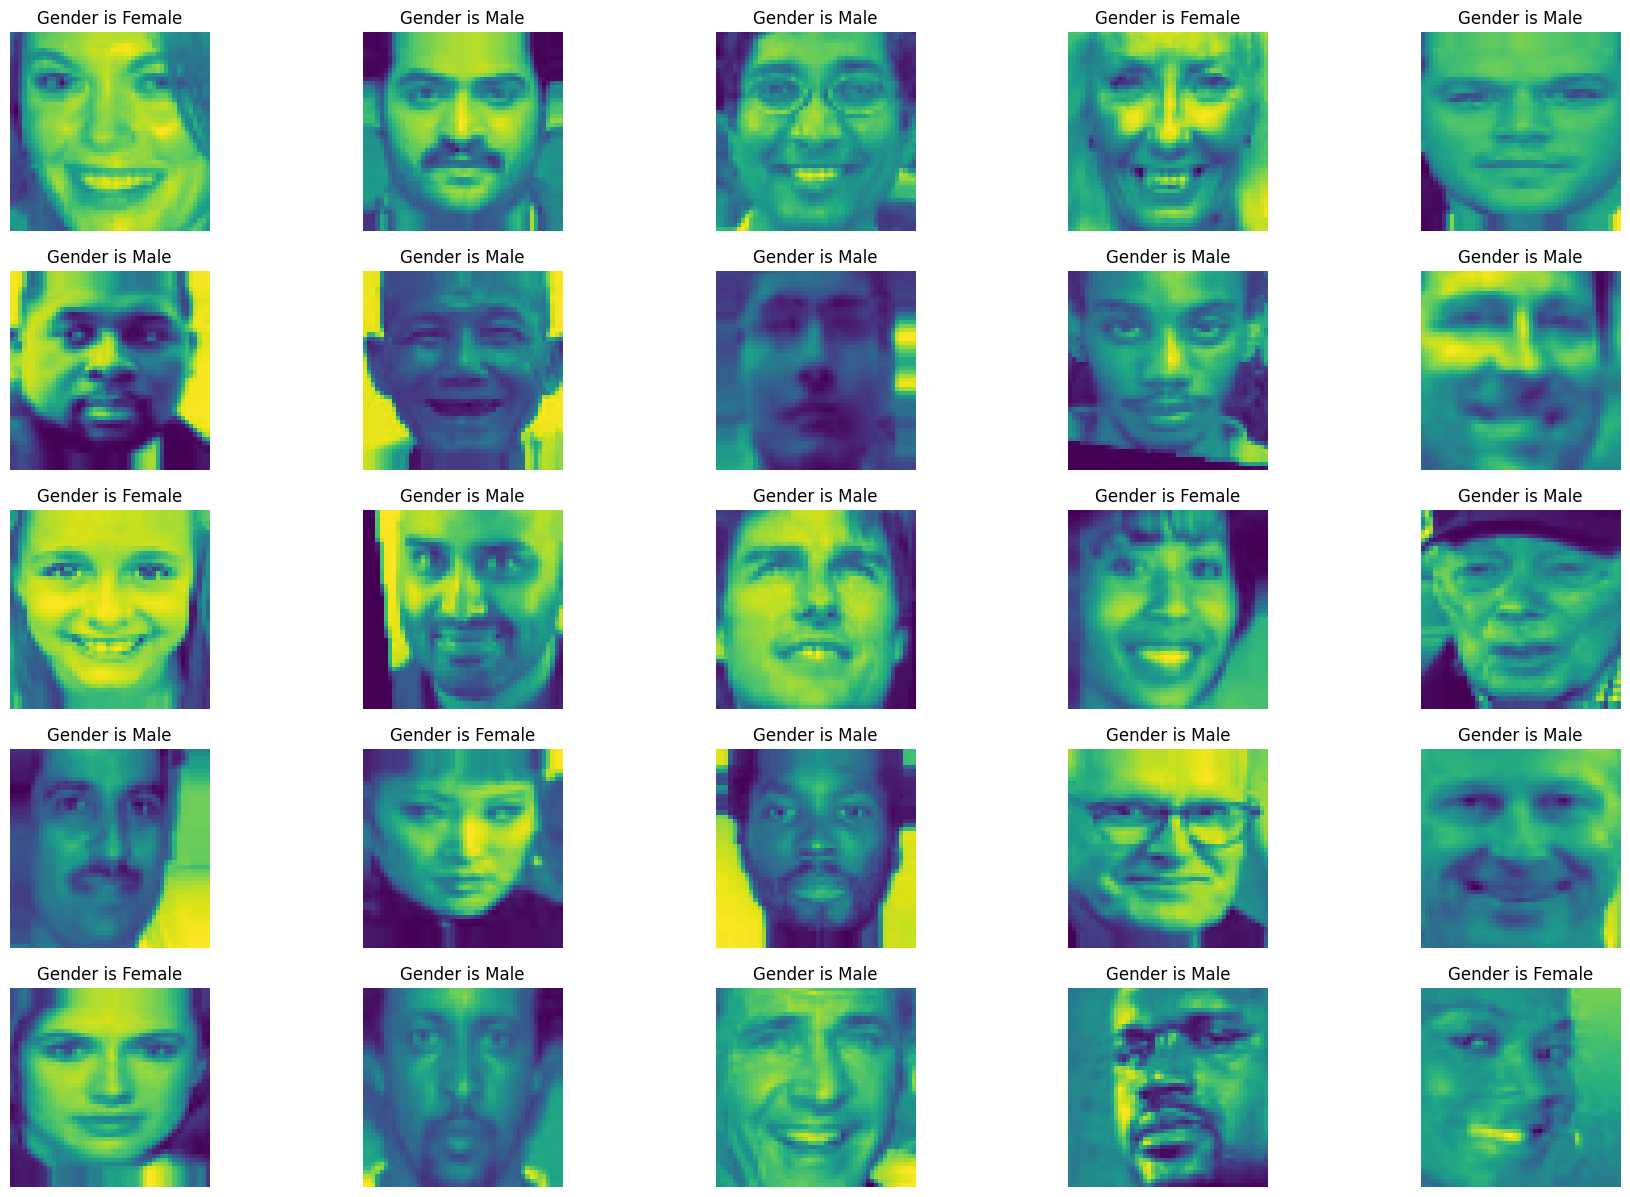

In [36]:
A,b = next(gen_train_ds)
showImagesGender(A,b)

## **Model**

In [37]:
model_gender = Sequential([
    Conv2D(32,(3,3), activation = "relu", input_shape = (48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(32,(3,3), activation = "relu"),
    MaxPooling2D(2,2),

    Dropout(0.3),

    Conv2D(64,(3,3), activation = "relu"),
    MaxPooling2D(2,2),

    #Conv2D(128,(3,3), activation = "relu"),
    #MaxPooling2D(2,2),

    Flatten(),

    #Dense(256,activation = 'relu'),
    #Dropout(0.5),

    Dense(64,activation = 'relu'),
    Dropout(0.5),


    Dense(1,activation='sigmoid')
])
model_gender.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          1

**compile the model**

In [38]:
model_gender.compile(optimizer='adam',loss = "binary_crossentropy",metrics=['accuracy'])


**Callbacks**

In [39]:
my_calls_1 = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
            keras.callbacks.ModelCheckpoint("Model_Gender.h5",verbose=1,save_best_only=True)]

**Train**

In [40]:
hist_gender = model_gender.fit(gen_train_ds,epochs = 23, validation_data = gen_val_ds, callbacks = my_calls_1)

Epoch 1/23
503/504 [============================>.] - ETA: 0s - loss: 0.5764 - accuracy: 0.6980
Epoch 1: val_loss improved from inf to 0.44723, saving model to Model_Gender.h5
504/504 [==============================] - 16s 26ms/step - loss: 0.5764 - accuracy: 0.6981 - val_loss: 0.4472 - val_accuracy: 0.7916
Epoch 2/23
  9/504 [..............................] - ETA: 6s - loss: 0.5364 - accuracy: 0.7292

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


504/504 [==============================] - ETA: 0s - loss: 0.4656 - accuracy: 0.7840
Epoch 2: val_loss improved from 0.44723 to 0.40232, saving model to Model_Gender.h5
504/504 [==============================] - 11s 21ms/step - loss: 0.4656 - accuracy: 0.7840 - val_loss: 0.4023 - val_accuracy: 0.8186
Epoch 3/23
503/504 [============================>.] - ETA: 0s - loss: 0.4271 - accuracy: 0.8054
Epoch 3: val_loss improved from 0.40232 to 0.36721, saving model to Model_Gender.h5
504/504 [==============================] - 9s 18ms/step - loss: 0.4271 - accuracy: 0.8054 - val_loss: 0.3672 - val_accuracy: 0.8260
Epoch 4/23
503/504 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.8130
Epoch 4: val_loss improved from 0.36721 to 0.34893, saving model to Model_Gender.h5
504/504 [==============================] - 9s 18ms/step - loss: 0.4077 - accuracy: 0.8128 - val_loss: 0.3489 - val_accuracy: 0.8383
Epoch 5/23
504/504 [==============================] - ETA: 0s - loss: 0.39

**Test**

In [41]:
model_gender.evaluate(gen_test_ds)

149/149 [==============================] - 1s 6ms/step - loss: 0.3109 - accuracy: 0.8654


[0.3108953535556793, 0.8654292225837708]

**Loss and Accuracy**

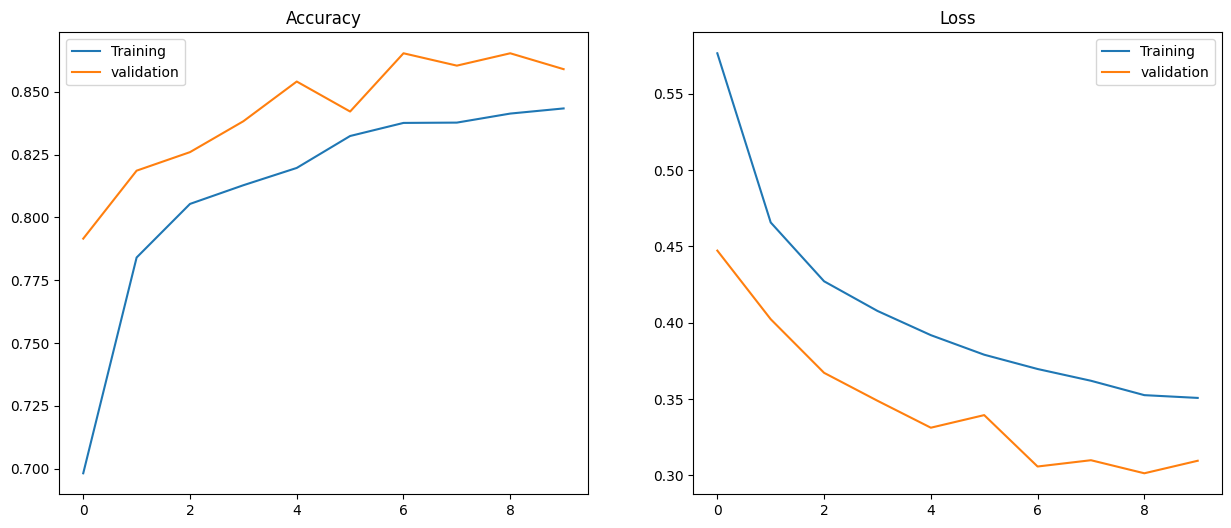

In [42]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist_gender.epoch,hist_gender.history['accuracy'],label = 'Training')
plt.plot(hist_gender.epoch,hist_gender.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_gender.epoch,hist_gender.history['loss'],label = 'Training')
plt.plot(hist_gender.epoch,hist_gender.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

**Predictions**



In [43]:
pred_gender = model_gender.predict(gen_test_ds)
pred_gen = []
for i in pred_gender:
    pred_gen.append(int(np.round(i[0])))

149/149 [==============================] - 1s 3ms/step


In [44]:
pred_gen[:5]

[1, 0, 1, 0, 0]

In [45]:
print(classification_report(pred_gen,y_test_gen))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2154
           1       0.93      0.82      0.87      2587

    accuracy                           0.87      4741
   macro avg       0.87      0.87      0.87      4741
weighted avg       0.87      0.87      0.87      4741



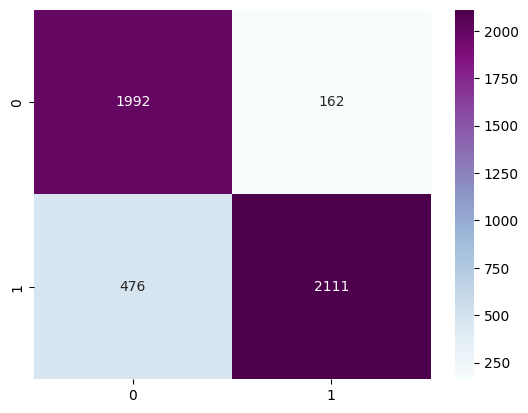

In [46]:
sns.heatmap(confusion_matrix(pred_gen,y_test_gen),annot = True, fmt = 'd', cmap = "BuPu");


In [47]:
def testGender(image,pred,actual):
    plt.figure(figsize=[22,15])
    for i in range(500,525):
        plt.subplot(5,5,(i%25)+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image[i])
        plt.xlabel("Actual Gender is {}".format(gender[actual[i]]))
        plt.ylabel("Prediced is {}".format(gender[pred[i]]))
    plt.show()

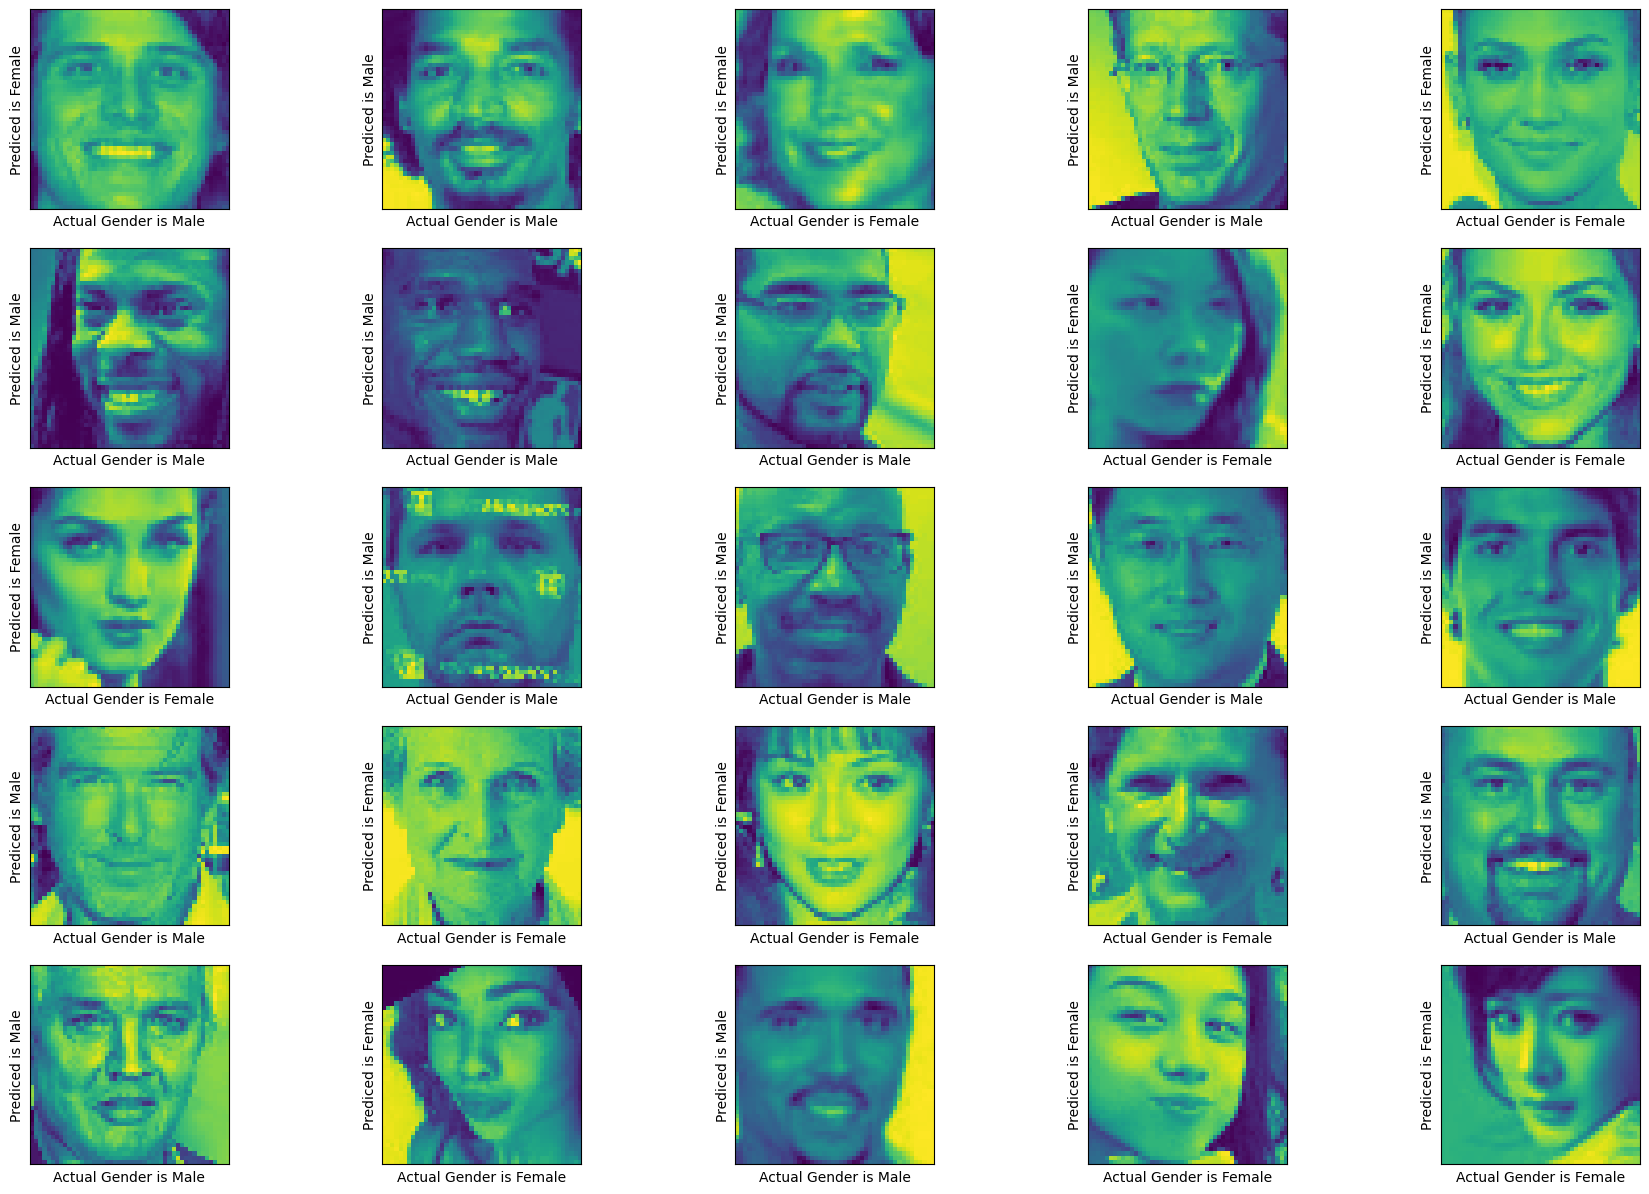

In [48]:
testGender(x_test_gen,pred_gen, y_test_gen)


# **References**

[1-Age, Gender and Race Prediction](https://github.com/prathimacode-hub/ML-ProjectKart/blob/main/Age%2C%20Gender%20and%20Ethnicity%20Prediction/Model/age_gender_race.ipynb)